(220, 554)


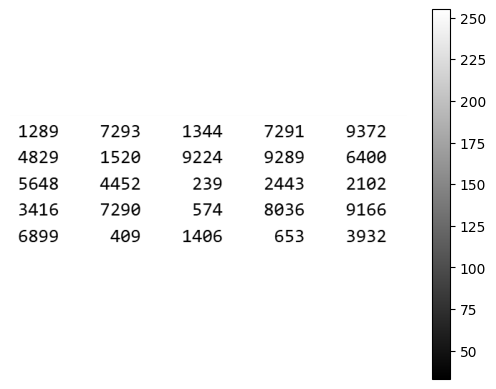

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ocr_test.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

In [5]:
import pyautogui
from PIL import Image
import tkinter as tk
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
import pandas as pd

today = str(dt.datetime.now()).split(' ')[0]
count = 0

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 6 outputbase digits'

def resizeFrame(event):
    if frame and button1 and button2 :
        button1.place(relx=0.18, rely=0.01, relwidth=0.3, relheight=0.08)
        button2.place(relx=0.52, rely=0.01, relwidth=0.3, relheight=0.08)
        frame.place(relx=0.05, rely=0.1, relwidth=0.9, relheight=0.86)
        
def getTargetRegion(root, frame):
    root_position = root.wm_geometry()
    x = int(root_position.split('+')[1])
    y = int(root_position.split('+')[2])
    w = root.winfo_width()
    h = root.winfo_height()
    w_f = frame.winfo_width()
    h_f = frame.winfo_height()
    return (x+12+int(np.ceil(0.05*w)),y+57+int(np.ceil(0.1*h)),w_f,h_f) # numbers 12 and 57 added to adjust a region of being captured

def getFileName(today, count):
    if str(dt.datetime.now()).split(' ')[0] == today:
        count =+ 1
    else: # initialize in case this program runs for days
        today = str(dt.datetime.now()).split(' ')[0]
        count = 0
    return f'{today}_{count}' # 2025-01-05 format

def showImg(img): # to get a preview
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def showHistogram(img):
    plt.hist(np.array(img).flatten(), edgecolor='white', bins=np.arange(0,261,10))
    plt.show()

def readNumbers(img):
    numbers = pytesseract.image_to_string(img, config=custom_config)
    return numbers

def NumbersToDf(numbers):
    n_row = len(numbers.split('\n')) - 1
    rows = []
    for elem in numbers.split('\n'):
        rows.append(elem.split(' '))
    df = pd.DataFrame(rows[:n_row])
    return df
    
def setThreshold(img):
    threshold = 50
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] < threshold:
                img[i][j] = 0
            else:
                img[i][j] = 255
     
    return img           

def savePNG(root, frame):
    screenshot = pyautogui.screenshot(region=getTargetRegion(root, frame)) # must concern the aread inside the transparent frame
    screenshot.save(getFileName(today, count)+'.png')
    print('saved') # change a color of button

def saveExcel(root, frame):
    screenshot = pyautogui.screenshot(region=getTargetRegion(root, frame))
    ss_gray = cv2.cvtColor(np.array(screenshot), cv2.COLOR_BGR2GRAY) # ss stands for screenshot..
    # showImg(ss_gray)
    # showHistogram(ss_gray)
    # ss_gray_equalized = cv2.equalizeHist(ss_gray)
    # showHistogram(ss_gray_equalized)
    # binary = setThreshold(ss_gray_equalized)
    # showImg(binary)
    # print(readNumbers(ss_gray))
    df = NumbersToDf(readNumbers(ss_gray))
    df.to_csv(getFileName(today, count)+'.csv', index=False)
    print('saved')
    
root = tk.Tk()
# root.configure(bg='gray')
root.geometry('900x900')
root.wm_attributes('-transparentcolor', 'red')

# button - image
button1 = tk.Button(root, text="Save as PNG", font=('serif', 12, 'bold'), command=lambda: [root.update(), frame.update, savePNG(root, frame)])
button1.place(relx=0.18, rely=0.01, relwidth=0.3, relheight=0.08)

# button2 - exel
button2 = tk.Button(root, text="Save as EXCEL", font=('serif', 12, 'bold'), command=lambda: [root.update(), frame.update, saveExcel(root, frame)])
button2.place(relx=0.52, rely=0.01, relwidth=0.3, relheight=0.08)

# make this transparent frame adjustable
frame = tk.Frame(root, bg='red')
frame.place(relx=0.05, rely=0.1, relwidth=0.9, relheight=0.86)
root.bind('<Configure>', resizeFrame)
root.title("Screen Reader")

root.attributes('-topmost', True)
root.mainloop()